In [1]:
# Import Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# get column names in measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# get column names in station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
# for measure in results:
#     print(measure.date, measure.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precip (in)'])

# Sort the dataframe by date
df = df.sort_values('Date')

df.head()

,Date,Precip (in)
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


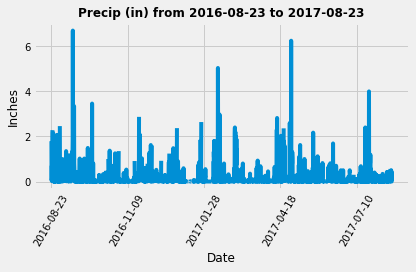

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

# UPDATED PLOT

df.plot(x='Date', y='Precip (in)', rot=60, fontsize=10, legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Inches', fontsize=12)
plt.title(f'Precip (in) from {one_year_ago} to 2017-08-23', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# ax = last_year_prcp_df_sorted.plot(kind='bar', figsize=(10,5), width=15)
# ax.legend(['Precipitation (inches)'], fontsize=12)
# ax.set_xlabel(f'Date: {one_year_ago} to 2017-08-23', fontsize=12)
# ax.set_ylabel('Precipitation (inches)', fontsize=12)
# ax.set_title(f'Amount of Precipitation (inches) from {one_year_ago} to 2017-08-23', fontsize=14)

# # turn off xticklabels - stackoverflow reference
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks
#     bottom=False,      # ticks along the bottom off
#     top=False,         # ticks along the top off
#     labelbottom=False) # labels along the bottom off

# plt.tight_layout()
# plt.show()

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp_df_sorted.describe()

,Precip (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).count()
print(f'The number of stations in the dataset is {stations}.')

The number of stations in the dataset is 9.


In [66]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
for station, actions in active_stations:
    print(station, actions)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

most_active_stats

[(54.0, 85.0, 71.66378066378067)]

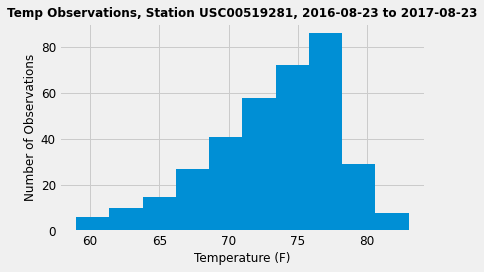

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

most_active_prior_yr = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prior_year).all()
# most_active_prior_yr

active_station_df = pd.DataFrame(most_active_prior_yr)
active_station_df.plot.hist(legend=False, fontsize=12)
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.title(f'Temp Observations, Station USC00519281, {prior_year} to 2017-08-23', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Close session

In [22]:
# Close Session
session.close()